In [1]:
import os
import sys
import glob

import warnings
warnings.filterwarnings('ignore') # Some things we'll be doing throw runtimewarnings that we won't care about. 

from astropy.io import fits
from astropy.wcs import WCS

import astropy.constants as const
import astropy.units as u
from astropy.visualization import astropy_mpl_style

import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm

### This is magic for Jupyer Notebooks. 
### Delete if putting into a script!
%matplotlib inline 
#######################################

import imageio 

In [2]:

galaxy = 'HE0045-2145'#'HE0045-2145'#MUSE/HE0150-0344/
cars_data_directory = 'MUSE/'+str(galaxy)+'/'

Make sure that all necessary data files are visible to this notebook: 

In [3]:
image_file = cars_data_directory + str(galaxy)+ '.unbinned.fits'
hdulist = fits.open(image_file)
hdulist.info()

z = 0.021 # The redshift, which I just grabbed from NED. Doesn't need to be too exact for our purposes.  
cz = z * const.c.to('km/s') # The stellar systemic velocity that we'll subtract off of our velocity maps. I always use Astropy Units - read up on them if you're not famililar!

Filename: MUSE/HE0045-2145/HE0045-2145.unbinned.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      44   (319, 314, 3682)   float32   
  1  ERROR         1 ImageHDU         9   (319, 314, 3682)   float32   


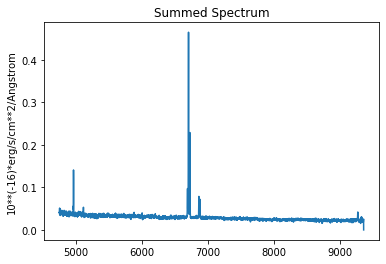

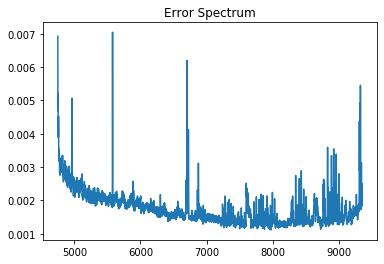

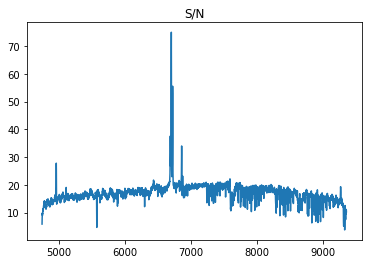

In [4]:
### Try plotting?
#print(hdulist[0].header)
# to get the wavelength axis use:

xs = np.linspace(0,np.shape(hdulist[0].data)[0]-1,np.shape(hdulist[0].data)[0])
wav = [hdulist[0].header['CRVAL3'] + hdulist[0].header['CDELT3']*x for x in xs]
plt.clf()
plt.plot(wav, hdulist[0].data[:,150,150])
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.show()

plt.clf()
plt.plot(wav, hdulist[1].data[:,150,150])
plt.title('Error Spectrum')
plt.show()

plt.clf()
plt.plot(wav, hdulist[0].data[:,150,150]/hdulist[1].data[:,150,150])
plt.title('S/N')
plt.show()


In [5]:
print(hdulist[0].header['CRVAL1'])
#h_spec['CRVAL1'] + np.arange(0,h_spec['CD1_1']*(h_spec['NAXIS1']),h_spec['CD1_1'])

11.922079


FWHM 2.942949415284199
Emission lines included in gas templates:
['Hbeta' 'Halpha' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


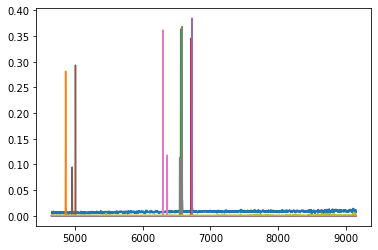

nNLines 7 bl 7
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
reg_dim (7,)
 Best Fit:       Vel     sigma
 comp.  0:        82       228
 comp.  1:       163        33
chi2/DOF: 1.013
method = capfit; Jac calls: 8; Func calls: 66; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  13 / 14
Templates weights:
    0.0034     0.094   0.00872    0.0498         0    0.0124    0.0697    0.0132     0.344      0.07    0.0457   0.00337   0.00728     0.133
Saving figure to ppxf_fit/HE0045.pdf
# id z_stars ez_stars sigma_stars esigma_stars z_gas ez_gas sigma_gas esigma_gas SN_median SN_rf_4000 SN_obs_8030 chi2dof


NameError: name 'ezfit_stars' is not defined

In [7]:
from ppxf_doubleG import ppxf_indiv

ppxf_indiv('HE0045',z,spec_hdu=hdulist, galaxy_lin=hdulist[0].data[:,140,150],
          error_lin=hdulist[1].data[:,140,150],
          plotfile='ppxf_fit/HE0045.pdf',
           reflines='reflines_tex.dat')

In [1]:
import matplotlib
plt.clf()

plt.plot(wav, np.sum(hdulist[0].data, axis=(1,2)))
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.clf()
#xs, ys = np.histogram(np.sum(hdulist[0].data, axis=(1,2)), bins = wav)
plt.step(wav, np.sum(hdulist[0].data, axis=(1,2)), color='black')
#plt.scatter(ys[:-1],xs, color='black')
plt.title('Summed Spectrum')
plt.ylabel(str(hdulist[0].header['BUNIT']))
#plt.xlim([6650, 6750])
plt.show()

plt.clf()

plt.step(wav, hdulist[0].data[:,150,150], color='black')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim([6650, 6750])
plt.show()

plt.imshow(np.sum(hdulist[0].data, axis=0), norm=matplotlib.colors.LogNorm())
plt.show()



NameError: name 'plt' is not defined

In [ ]:
# Fit a Gauss to this:
import scipy

def one_gauss_fit(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))
def two_gauss_fit(x, a, mu, sigma, a2, mu2, sigma2):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + a2*np.exp(-(x-mu2)**2/(2*sigma2**2)) 
def linefit(x,m,b):
 
    return [m*i + b for i in x]


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]




def fit_gaussians_aik(wav, data, error, pix_x, pix_y , guess_mu):

    print(np.min(data))

    

    # first, fit a line:
    print(np.shape(wav), np.shape(data))
    poptline, pcov = scipy.optimize.curve_fit(linefit, wav, data, p0=[0.1,np.min(data)])
    print(poptline)
    line = linefit(wav, *poptline)
    #line = [line_y for x in wav[idx_1:idx_2]]
    
    guess = [np.max(data), guess_mu, 5]
    popt, pcov = scipy.optimize.curve_fit(one_gauss_fit, wav,data, p0=guess)
    print('best fit for 1 gauss', popt)
    gauss_1 = one_gauss_fit(wav, *popt)

    # Now fit 2 Gauss
    guess2 = [popt[0]/2, popt[1], popt[2], popt[0]/2, popt[1]-2, popt[2]]
    try:
        popt2, pcov2 = scipy.optimize.curve_fit(two_gauss_fit, wav,data, p0=guess2)
    except:
        plt.clf()
        plt.step(wav, data)
        plt.show()
        return 0, 0
    
    gauss_2_1 = one_gauss_fit(wav, *[popt2[0], popt2[1], popt2[2]])
    gauss_2_2 = one_gauss_fit(wav, *[popt2[3], popt2[4], popt2[5]])
    gauss_2 = two_gauss_fit(wav, *popt2)

    chi_line = np.sum(abs(line - data)**2/error**2)
    chi_1 = np.sum(abs(gauss_1 - data)**2/error**2)
    chi_2 = np.sum(abs(gauss_2 - data)**2/error**2)

    n = idx_2 - idx_1

    k = 2
    aik_line = chi_line + 2*k + 2*k*(k+1)/(n - k - 1)
    
    k = 3
    aik_1 = chi_1 + 2*k + 2*k*(k+1)/(n - k - 1)

    k = 6
    aik_2 = chi_2 + 2*k + 2*k*(k+1)/(n - k - 1)
    #AIC = chi +2k
    #AIC + 2k(k + 1)/(n − k − 1)

    plt.clf()
    plt.plot(wav, line, color='blue')
    plt.step(wav, data, color='black', where='mid', label='Data')
    plt.scatter(wav, data, color='black', s=5)
    plt.step(wav, one_gauss_fit(wav, *popt), color='red', label='1 Gauss', where='mid')
    #plt.step(wav[idx_1:idx_2], two_gauss_fit(wav[idx_1:idx_2], *popt2), color='orange', label='2 Gauss')#, where='mid')
    plt.step(wav, gauss_2_1, color='orange', where='mid', label='2 Gauss')
    plt.step(wav, gauss_2_2, color='orange', where='mid')


    plt.title('Individual Spaxels')
    plt.ylabel(str(hdulist[0].header['BUNIT']))
    plt.legend(loc='upper center', bbox_to_anchor=(1.15, 0.8))
    plt.annotate('$AIK_1$ = '+str(round(aik_1,1)), xy=(0.05, 0.95), xycoords='axes fraction', color='red')
    plt.annotate('$AIK_2$ = '+str(round(aik_2,1)), xy=(0.05, 0.9), xycoords='axes fraction', color='orange')
    
    if aik_line < aik_1 and aik_line < aik_2:
        plt.annotate('Line is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
        fit = 0
        fit_param = poptline
    else:
        if aik_2 < aik_1:
            plt.annotate('Two is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 2
            fit_param = popt2
            
        else:
            plt.annotate('One is best', xy=(0.05, 0.85), xycoords='axes fraction', color='black')
            fit = 1
            fit_param = popt
           

    #plt.xlim([6650, 6750])
    plt.show()

    
    #data, error, gauss_1, gauss_2, gauss_2_1, gauss_2_2, aik_line, aik_1, aik_2,
    return fit, fit_param

start_x = 6712
end_x = 6732
mu = 6723

idx_1 = find_nearest(wav, start_x)[0]
idx_2 = find_nearest(wav, end_x)[0]

wavecut = wav[idx_1:idx_2]

fit_n = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
vel_narrow = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
vel_broad = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
sig_narrow = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))
sig_broad = np.zeros((len(hdulist[0].data[1]),len(hdulist[0].data[2])))

for j in range(len(hdulist[0].data[1])):
    for i in range(len(hdulist[0].data[2])):
        # For each row, quickly do a S/N calculation to see if you even try to fit it
        if np.all(hdulist[0].data[idx_1:idx_2, j, i]) ==0.0:
            continue
        data = hdulist[0].data[:,j,i][idx_1:idx_2] - cont_model[0].data[:,j,i][idx_1:idx_2]
        error = hdulist[1].data[:,j,i][idx_1:idx_2]
        
        S_N = data/error
        if np.median(S_N) < 5:#was 10
            continue
            
        '''plt.clf()
        plt.step(wav[idx_1:idx_2],data, label='Data')
        plt.step(wav[idx_1:idx_2],error, label='Noise')
        plt.legend()
        plt.title('j = '+str(j)+', i = '+str(i))
        plt.show()'''
        
        
        out = fit_gaussians_aik(wavecut, data, error, j,i, mu)
        fit_n[j,i] = out[0]
        if out[0] ==2:
            vel_narrow[j,i] = out[1][1]
            sig_narrow[j,i] = out[1][2]
            vel_broad[j,i] = out[1][4]
            sig_broad[j,i] = out[1][5]
        if out[0] ==1:
            vel_narrow[j,i] = out[1][1]
            sig_narrow[j,i] = out[1][2]
            
        #if out


In [2]:
print(fit_n)

class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


colorsList = ['#feb922','#e6d1fc','#2ec4b6']
CustomCmap = matplotlib.colors.ListedColormap(colorsList)

plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(np.sum(hdulist[0].data, axis=0), norm = matplotlib.colors.LogNorm())
plt.colorbar(im0, label='Summed Flux',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(fit_n, cmap=CustomCmap)#'Set2')
plt.colorbar(im1, label='# Gaussian Components',fraction = 0.046)
plt.tight_layout()
plt.savefig('n_comps.png', dpi=1000)


plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(np.ma.masked_where(vel_broad==0, vel_broad), cmap='RdBu_r', norm=MidpointNormalize(midpoint=cz.value))
plt.colorbar(im0, label='Velocity Broad',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(np.ma.masked_where(vel_narrow==0, vel_narrow)-cz.value)
plt.colorbar(im1, label='Velocity Narrow',fraction = 0.046)
plt.tight_layout()
plt.show()
#plt.savefig('vel_comps.png', dpi=1000)

plt.clf()
fig = plt.figure()
ax0 = fig.add_subplot(121)
im0 = ax0.imshow(sig_broad)
plt.colorbar(im0, label='Sigma Broad',fraction = 0.046)

ax1 = fig.add_subplot(122)
im1 = ax1.imshow(sig_narrow, vmin=0)
plt.colorbar(im1, label='Sigma Narrow',fraction = 0.046)
plt.tight_layout()
plt.show()
#plt.savefig('sig_comps.png', dpi=1000)

NameError: name 'fit_n' is not defined

Read in the image data and header:

In [295]:
data = hdulist[0].data
header = hdulist[0].header
hdulist.close()

I want to make a movie that steps through the velocity structures of the H-alpha + [N II] emission lines. Let's find roughly where that is in the cube. 

In [296]:
ha_wavelength_at_z = 6563*u.AA * (1+z)
ha_wavelength_at_z

<Quantity 6700.823 Angstrom>

Let's first identify (roughly) which spectral channel in the MUSE cube this wavelength corresponds to. Note that the spectral axis of the MUSE cube is not "automatically" in units of wavelength. One needs to convert the spectral axis to a wavelength array using the dispersion information encoded in the FITS header, following the standard FITS `CRPIX / CRDEL` keywords. 

How do we do this? 

First, let's take a look at the shape of the cube itself:

In [297]:
np.shape(data)

(3682, 314, 319)

There are 3681 spectral elements (channels), and 219x220 spatial elements (e.g. RA, Dec "pixels" across the FOV, if you will). This is smaller than the native MUSE pixel resolution because we've binned up the data to increase S/N. 

In [298]:
number_of_channels = len(data[:,0,0])
number_of_channels

3682

You might not be familiar with how the wavelength axis is encoded in MUSE data (or all FITS images, for that matter). By the FITS standard, we encode the dispersion thusly: 
```
CUNIT3  = 'Angstrom'
CD3_3   = 1.25
CRPIX3  = 1.
CRVAL3  = 4749.70068359375    
```

__This is how you create a wavelength array__:

In [299]:
wavelength = ((np.arange(number_of_channels) + 1.0) - header['CRPIX3']) * header['CD3_3'] + header['CRVAL3']
wavelength

array([4750.38134766, 4751.63134766, 4752.88134766, ..., 9349.13134766,
       9350.38134766, 9351.63134766])

That looks better! We now have a wavelength array. Let's find which channel number corresponds to the redshifted wavelength of H$\alpha$ for this source. 

In [300]:
# This quick one liner finds the element in the wavelength array 
# that is closest to the "target" wavelength, then returns that element's 
# index. 

# It finds the deviation between each array element and the target value, 
# takes its absolute value, and then returns the index of 
# the element with the smallest value in the resulting array. 
# This is the number that is closest to the target. 

ha_channel = (np.abs(wavelength - ha_wavelength_at_z.value)).argmin()
ha_channel

1560

So we know that the H$\alpha$ line centroid should be somewhat close to the above channel. It probably won't be exact, because the emission line redshift can sometimes differ a bit from the redshift reported in NED. But it'll be very close. 

Let's plot this channel:


First, though, we'll make a temporary directory to store our movie "frames" in: 

In [301]:
temp_movie_dir = "movie/"

if not os.path.exists(temp_movie_dir):
    os.makedirs(temp_movie_dir)

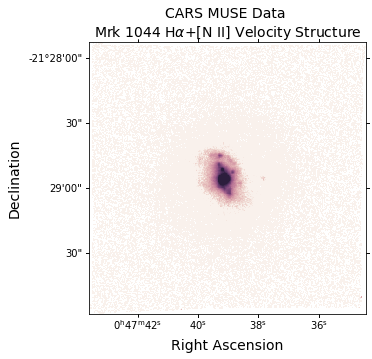

In [302]:
image = data[ha_channel,:,:]

image[image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


We can do a *very* rough continuum subtraction, too. We know, for example, that 200 spectral channels blueward of the H$\alpha$ peak will always land in a line-free region of the continuum. We're only showing one channel at a time, so let's just subtract this smooth continuum-only channel from every frame of our movie, i.e.: 

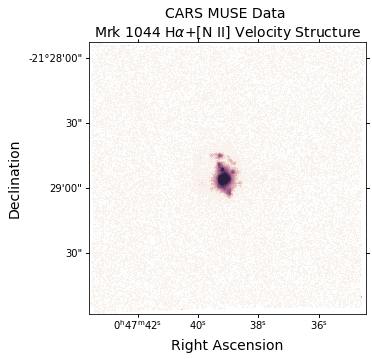

In [303]:
cont_sub_image = data[ha_channel,:,:] - data[ha_channel - 200,:,:]


cont_sub_image[cont_sub_image == 0] = np.nan # The reprojection makes the "background" equal to zero, which then gets mapped by the colormap. Prevent this! 


fig = plt.figure(figsize=(5,5))
ax = plt.subplot(projection=wcs)

ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
ax.coords[1].set_axislabel('Declination', fontsize=fontsize)

ax.set_title("CARS MUSE Data \n" r'Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=fontsize)


cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
cmap.set_bad('white',1)


frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')


Not bad for a cheap continuum subtraction, right?! 

#### Now, we can make the movie! 

Hopefully the stuff below is pretty straightforward. Again, let me know if you don't understand something!

In [304]:
### How long do you want each movie? 
channels_to_show = 30 # <-- Change me
####################################

movie_start = ha_channel - channels_to_show
movie_end = ha_channel + channels_to_show


slices_of_interest = np.arange(movie_start, movie_end, 1)
png_files = []

# Clean the temporary movie directory first
# If you don't remove all "old" movie frames, your gif is gonna be messed up. 
for f in glob.glob(temp_movie_dir + "*.png"):
    os.remove(f)

for i, slice in enumerate(slices_of_interest):
    cont_sub_image = data[slice,:,:] - data[ha_channel - 200,:,:]
    cont_sub_image[cont_sub_image == 0] = np.nan
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(projection=wcs)
    ax.coords[0].set_axislabel('Right Ascension', fontsize=fontsize)
    ax.coords[1].set_axislabel('Declination', fontsize=fontsize)
    ax.set_title(r'CARS: Mrk 1044 H$\alpha$+[N II] Velocity Structure', fontsize=12)
    cmap = sns.cubehelix_palette(20, light=0.95,dark=0.15, as_cmap=True)
    cmap.set_bad('white',1)
    frame = ax.imshow(cont_sub_image, origin='lower', norm=LogNorm(), vmin=0.0045, vmax=0.15, cmap=cmap, interpolation='None')
    fig.savefig('movie/' + '{}'.format(i) + '.png', bbox_inches='tight', dpi=100, pad_inches=0)
    png_files.append('movie/' + '{}'.format(i) + '.png')
    plt.close(fig) # don't spam me with a gajillion figures

In [306]:
gif_name = 'images/movie.gif'

gif_frames = []

# Remove any old GIFs you might have made
if os.path.isfile(gif_name):
    os.remove(gif_name)

for filename in png_files:
    gif_frames.append(imageio.imread(filename))

imageio.mimsave(gif_name, gif_frames)



FileNotFoundError: The directory '/Users/beckynevin/CfA_Code/CARS_data/images' does not exist

In [ ]:
import random
__counter__ = random.randint(0,2e9)

from IPython.display import HTML, display
display(HTML('<img src={}>'.format(gif_name)))

The movie should look like this: 

![Learn to make this movie](images/movie.gif)


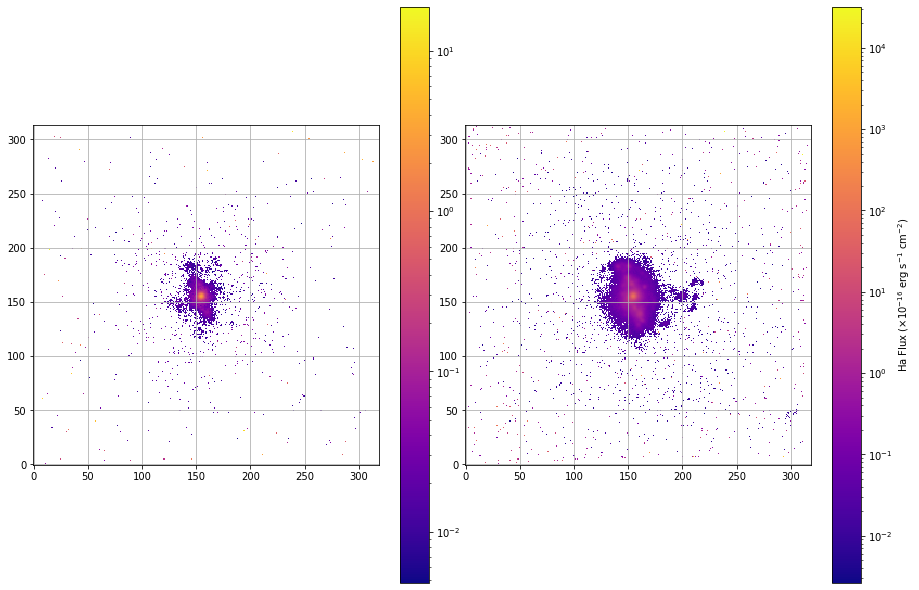

In [307]:
'''Now Becky wants to do the same thing for OIII and plot side by side with Halpha'''

gas_select = (OIII5007_flux / OIII5007_flux_err > 3)

OIII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_flux[gas_select]

fig = plt.figure()

ax = plt.axes([0,0,1,2])

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()
cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
ax.set_label('OIII')

ax1 = plt.axes([1,0,1,2])

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.set_label('Halpha')
cbar.set_label(r"Ha Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")

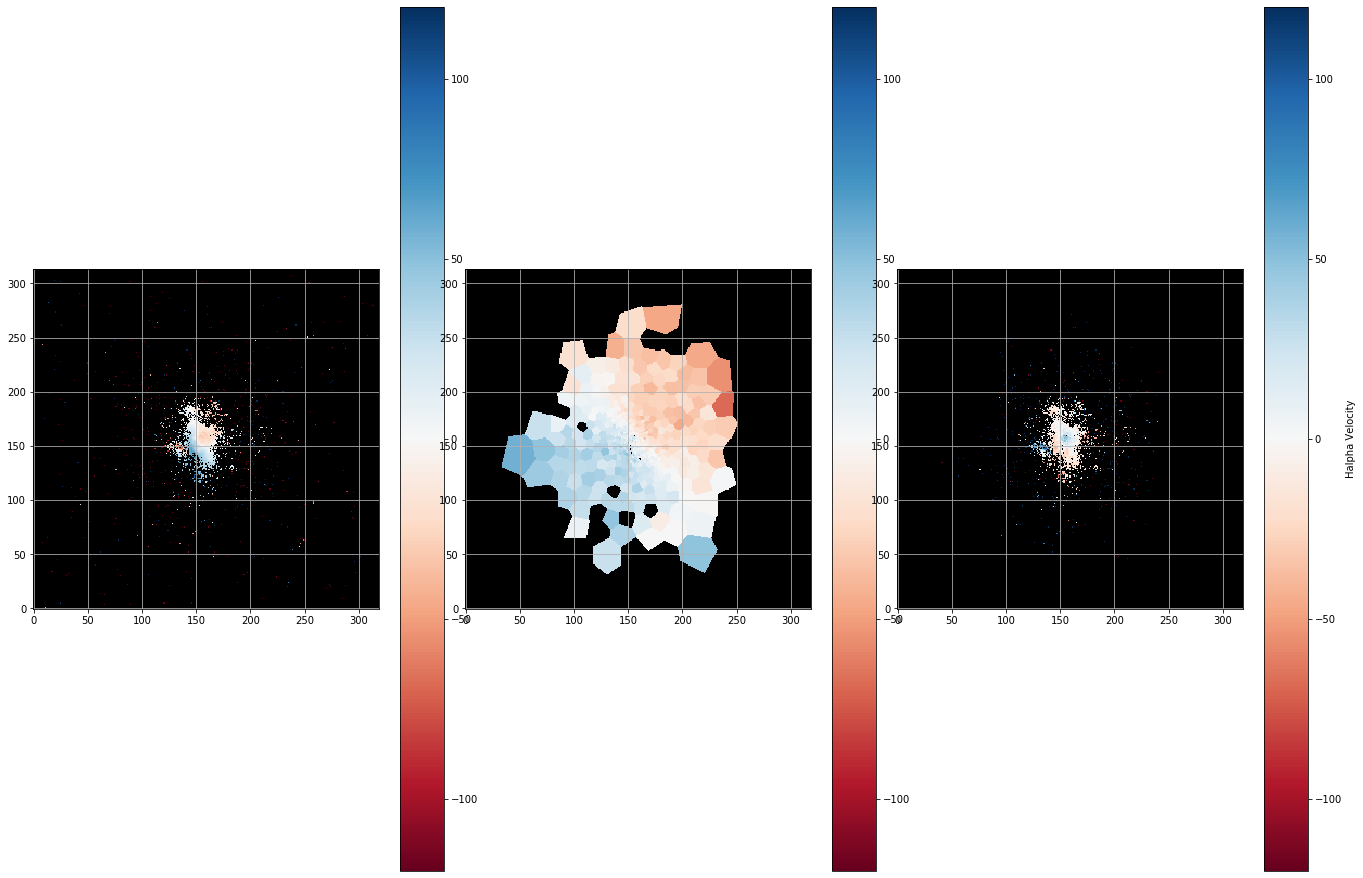

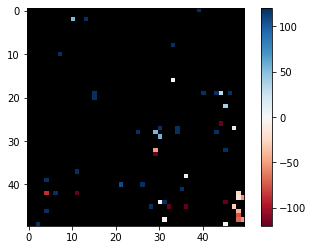

In [308]:
median_OIII_vel = np.median(OIII5007_vel[gas_select])

OIII_vel_map = np.full((dim[0],dim[1]) ,np.nan)
OIII_vel_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = OIII5007_vel[gas_select] - median_OIII_vel

fig = plt.figure()

ax = plt.axes([0,0,1,3])

ax.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"OIII Velocity")

ax1 = plt.axes([1,0,1,3])

ax1.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")


ax2 = plt.axes([2,0,1,3])

ax2.grid('off')


cmap = cm.RdBu
cmap.set_bad('black',1)

frame = plt.imshow(stellar_vel_map-OIII_vel_map, origin='lower', cmap=cmap, vmin=-120, vmax=120, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Halpha Velocity")

plt.show()

plt.clf()
plt.imshow((stellar_vel_map-OIII_vel_map)[75:125,75+25:125+25], cmap=cmap, vmin=-120, vmax=120)
plt.colorbar()
plt.show()

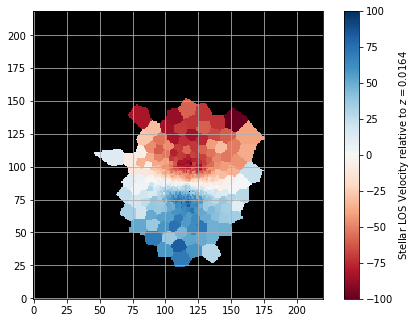

In [71]:
fig = plt.figure()

ax = plt.axes([0,0,1,1])
ax.grid('off')

cmap = cm.RdBu
cmap.set_bad('black',1) # I make the NANs black here because white is included in my colormap, encoding values near zero

frame = plt.imshow(stellar_vel_map, origin='lower', cmap=cmap, vmin=-100, vmax=100, interpolation='None')
cbar = plt.colorbar()
cbar.set_label(r"Stellar LOS Velocity relative to $z=0.0164$")

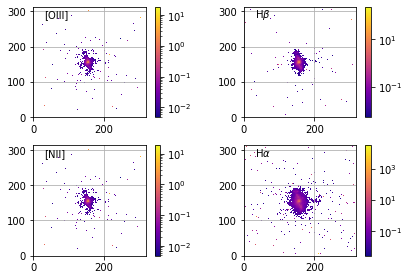

In [309]:
'''What about making BPT ratios?'''

gas_select = (NII6583_flux / NII6583_flux_err > 3)

NII_flux_map = np.full((dim[0],dim[1]) ,np.nan)
NII_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = NII6583_flux[gas_select]

gas_select = (Hb_flux / Hb_flux_err > 3)

Hb_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Hb_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Hb_flux[gas_select]


fig = plt.figure()

ax = fig.add_subplot(221)

ax.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(OIII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar1 = plt.colorbar()

ax.annotate('[OIII]', xy=(0.1,0.9), xycoords='axes fraction')


ax1 = fig.add_subplot(222)

ax1.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Hb_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax1.annotate(r'H$\beta$', xy=(0.1,0.9), xycoords='axes fraction')

ax2 = fig.add_subplot(223)

ax2.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(NII_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar2 = plt.colorbar()
#cbar1.set_label(r"[OIII]5007 Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")
#ax.set_label('OIII')
ax2.annotate('[NII]', xy=(0.1,0.9), xycoords='axes fraction')


ax3 = fig.add_subplot(224)

ax3.grid('off')


cmap = cm.plasma
cmap.set_bad('white',1) # Make the NANs white

frame = plt.imshow(Ha_flux_map, origin='lower', cmap=cmap, norm=LogNorm(), interpolation='None')
cbar = plt.colorbar()
ax3.annotate(r'H$\alpha$', xy=(0.1,0.9), xycoords='axes fraction')

plt.tight_layout()
plt.show()



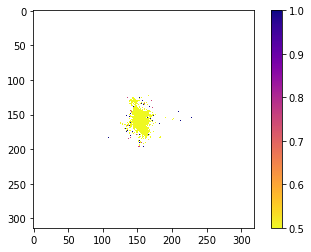

In [310]:
import math
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#Kewley: log([O III]/Hβ) < 0.61/[log([N II]/Hα) − 0.05] + 1.3
xs_kew = np.linspace(-2,0,100)
ys_kew = [0.61/(x-0.05) + 1.3 for x in xs_kew]

#Composite: 0.61/[log([N II]/Hα) − 0.47] + 1.19 > log([O III]/Hβ)
xs_comp = np.linspace(-2,0.4,100)
ys_comp = [0.61/(x-0.47) + 1.19 for x in xs_comp]

spatial_BPT = np.zeros((np.shape(Ha_flux_map)[0], np.shape(Ha_flux_map)[1]))
for i in range(np.shape(Ha_flux_map)[0]):
    for j in range(np.shape(Ha_flux_map)[1]):
        if np.isnan(OIII_flux_map[i,j]) or np.isnan(Hb_flux_map[i,j]) or np.isnan(NII_flux_map[i,j]) or np.isnan(Ha_flux_map[i,j]):
            continue
        else:
            OIII_Hbeta_ratio = math.log(OIII_flux_map[i,j]/Hb_flux_map[i,j])
            NII_Halpha_ratio = math.log(NII_flux_map[i,j]/Ha_flux_map[i,j])
            
            if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.05)+1.3):#Then it is an AGN
                spatial_BPT[i,j]=1.0
            else:
                if NII_Halpha_ratio > (0.61/(OIII_Hbeta_ratio-0.47)+1.19):#Then its a composite
                    spatial_BPT[i,j]=0.75
                else:#SF
                    spatial_BPT[i,j]=0.5
                    
spatial_BPT_ma = np.ma.masked_where(spatial_BPT==0,spatial_BPT)

plt.clf()
plt.imshow(np.flipud(spatial_BPT_ma), cmap='plasma_r')
plt.colorbar()
plt.show()

In [ ]:
'''It might be nice to look at this for a bunch of different galaxies, I for one an surprised it is not dominated by AGN-like emission'''


In [109]:
'''It also might be nice to use the shock diagnostics from Comerford et al. 2017'''

'''Cannot do this because we do not have 4363 :('''

NameError: name 'OIII4363_flux' is not defined

### How to look at the emission and continuum model
[Return to Top](#contents)

This section takes a peek at how to use the eline and continuum models in concert with the full cube.

One thing we do is to looka t if subtracting off the best fit continuum and emission lines for each spaxel leaves any significant residuals.

In [30]:
cont_model = fits.open('/Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/'+galaxy+'.cont_model.fits')
eline_model = fits.open('/Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/'+galaxy+'.eline_model.fits')

(3682, 314, 319)


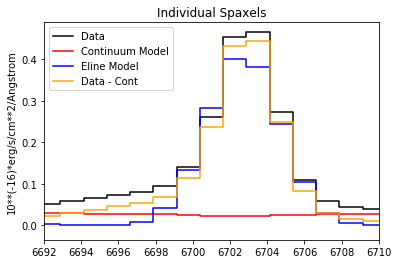

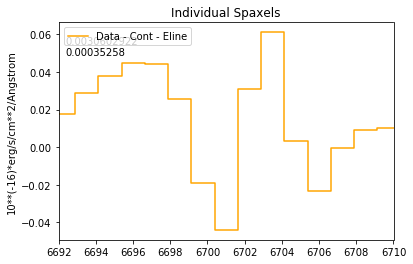

In [176]:
print(np.shape(cont_model[0].data))

#wave_range = [4950,4975] #hbeta
wave_range = [6692, 6710]

plt.clf()
plt.step(wav, hdulist[0].data[:,150,150], color='black', label = 'Data')
plt.step(wav, cont_model[0].data[:,150,150], color='red', label = 'Continuum Model')
plt.step(wav, eline_model[0].data[:,150,150], color='blue', label = 'Eline Model')

plt.step(wav, hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150], color='orange', label = 'Data - Cont')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim(wave_range)
#plt.xlim([6000,7000])
plt.legend()
plt.show()


plt.clf()

plt.step(wav, hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150], 
         color='orange', label = 'Data - Cont - Eline')
plt.annotate(str(np.std(hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150])),
             xy = (0.02,0.9), xycoords='axes fraction')
plt.annotate(str(np.mean(hdulist[0].data[:,150,150] -cont_model[0].data[:,150,150] -eline_model[0].data[:,150,150])),
             xy = (0.02,0.85), xycoords='axes fraction')
#plt.plot(wav, hdulist[0].data[:,140,150])
plt.title('Individual Spaxels')
plt.ylabel(str(hdulist[0].header['BUNIT']))
plt.xlim(wave_range)
#plt.xlim([6000,7000])
plt.legend()
plt.show()

Filename: /Users/beckynevin/CfA_Code/CARS_data/MUSE/HE0045-2145/fitting/full/HE0045-2145.cont_model.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  DATA          1 PrimaryHDU      44   (319, 314, 3682)   float32   
  1  BADPIX        1 ImageHDU         9   (319, 314, 3682)   uint8   
  2  NORMALIZE     1 ImageHDU         9   (319, 314, 3682)   float64   
None
XTENSION= 'IMAGE   '           / Image extension                                BITPIX  =                    8 / array data type                                NAXIS   =                    3 / number of array dimensions                     NAXIS1  =                  319                                                  NAXIS2  =                  314                                                  NAXIS3  =                 3682                                                  PCOUNT  =                    0 / number of parameters                           GCOUNT  =                    1 / number of groups     

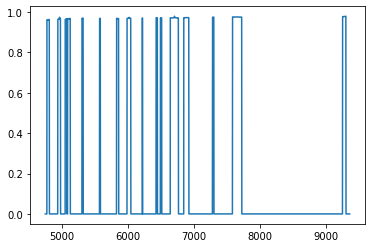

In [89]:
print(cont_model.info())
print(cont_model[1].header)
plt.plot(wav,cont_model[1].data[:,150,150]*(1-cont_model[0].data[:,150,150]))
plt.show()

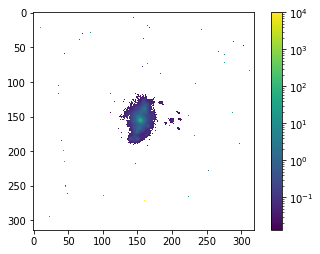

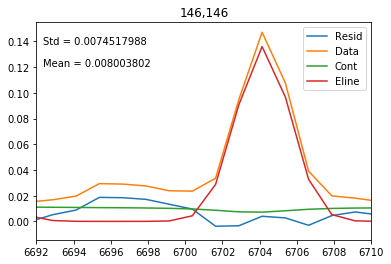

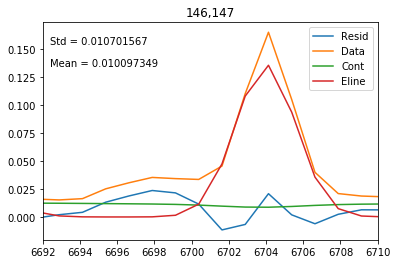

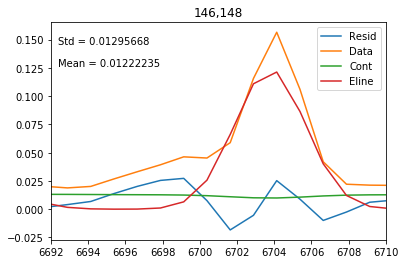

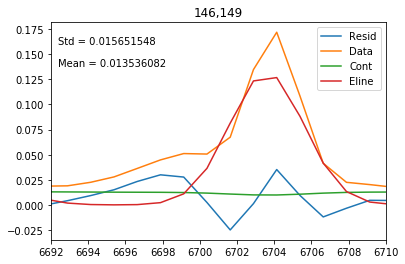

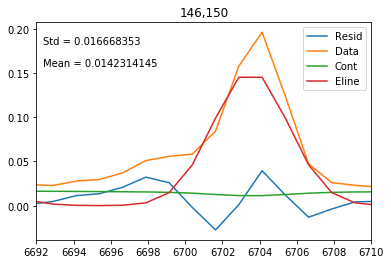

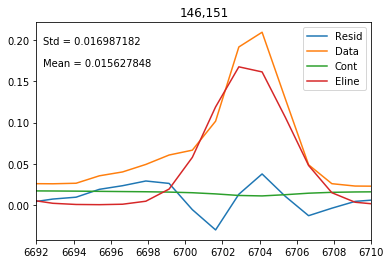

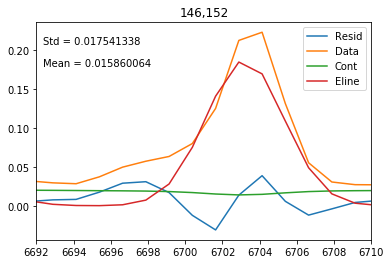

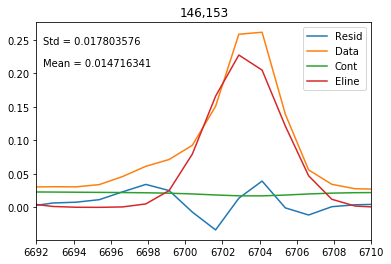

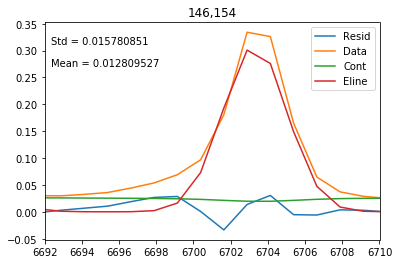

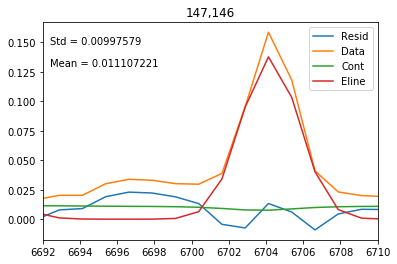

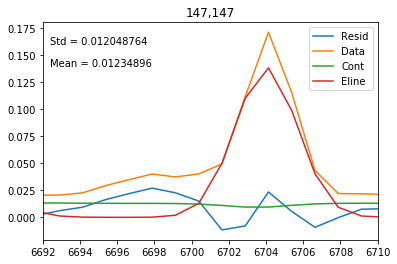

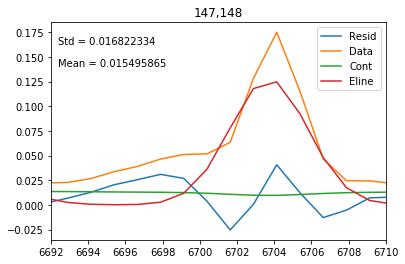

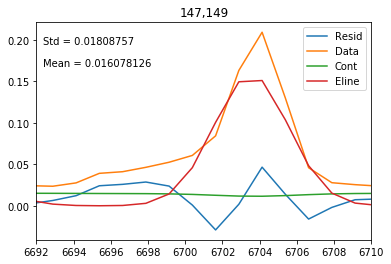

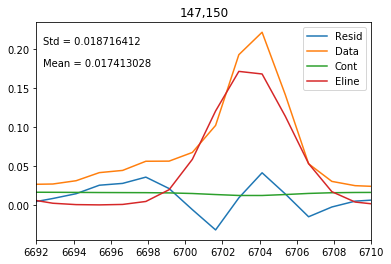

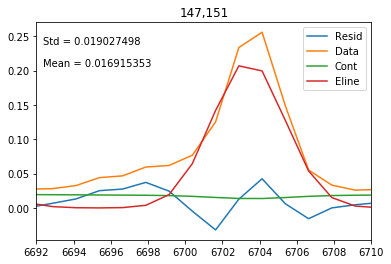

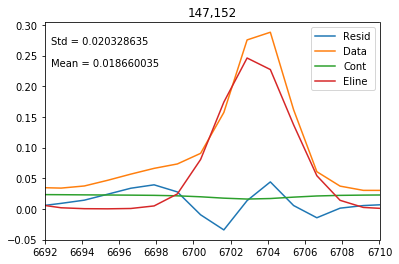

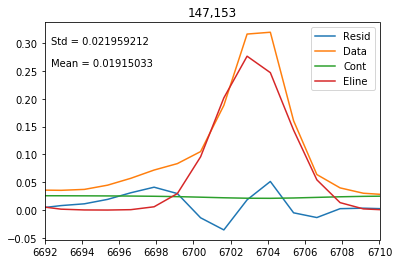

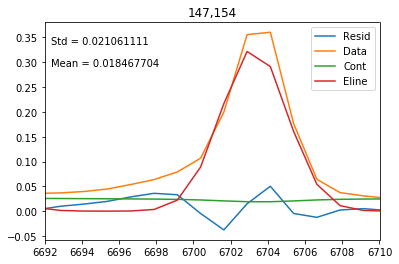

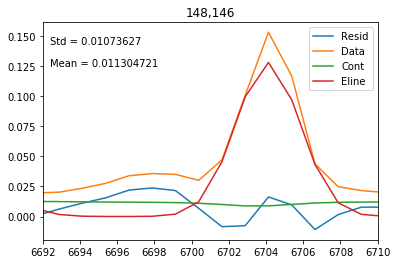

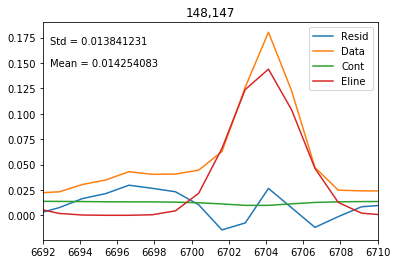

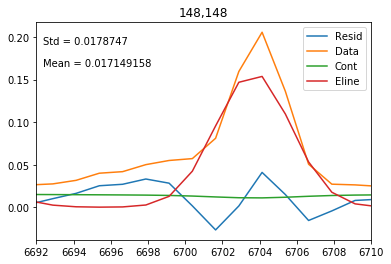

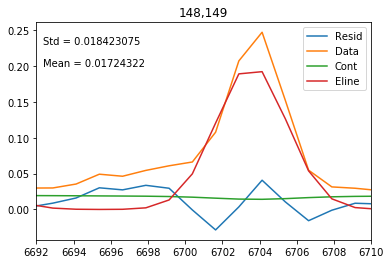

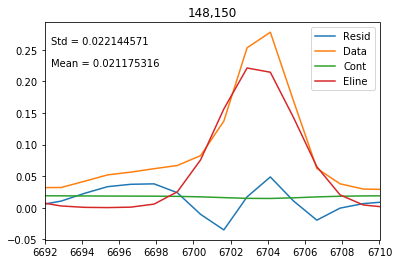

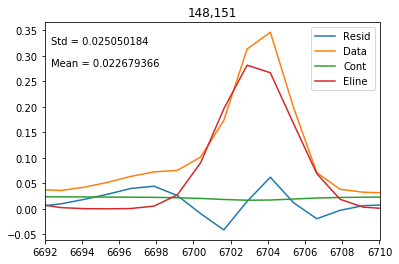

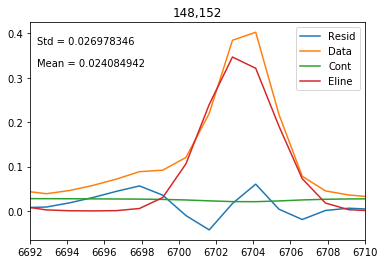

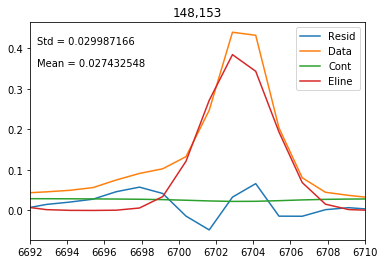

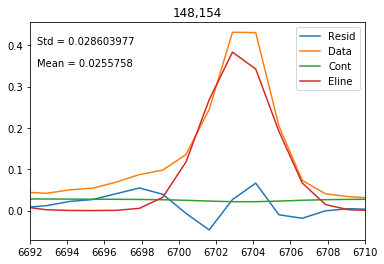

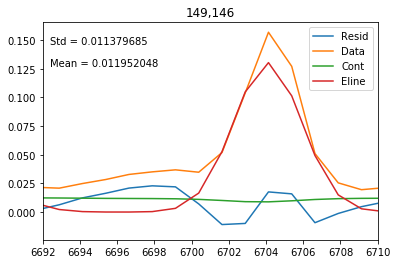

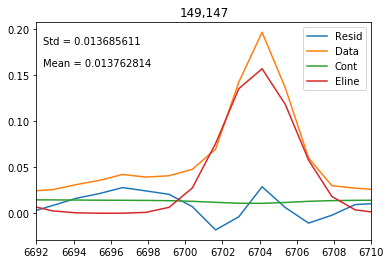

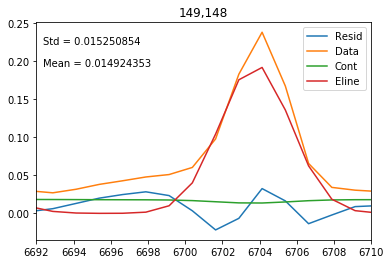

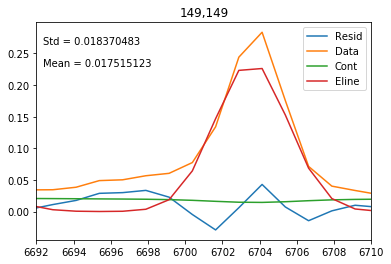

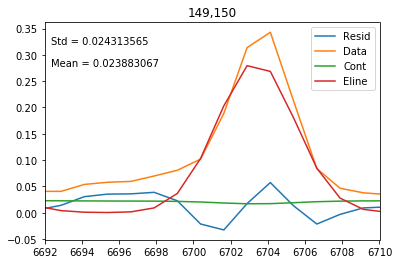

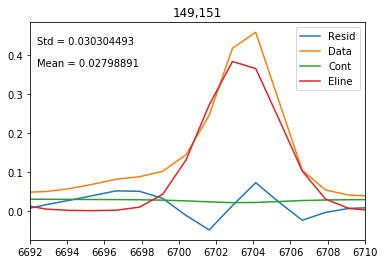

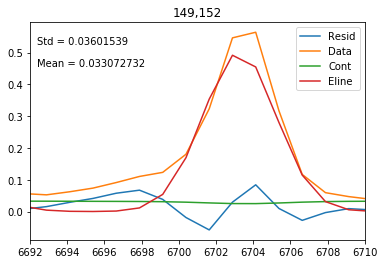

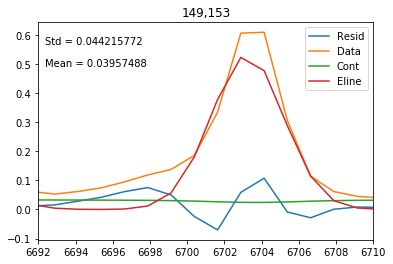

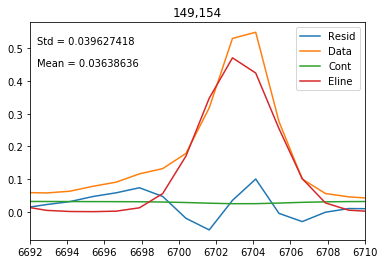

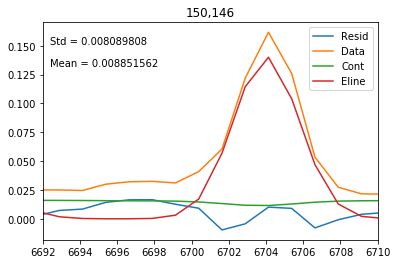

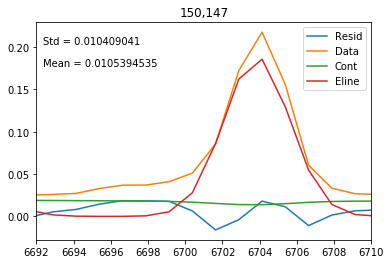

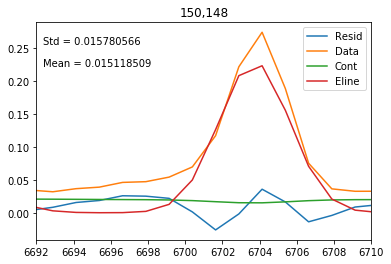

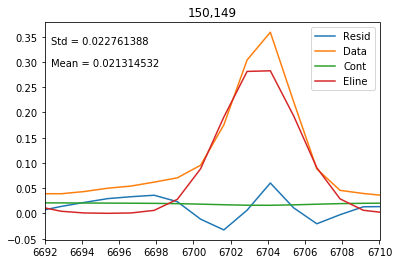

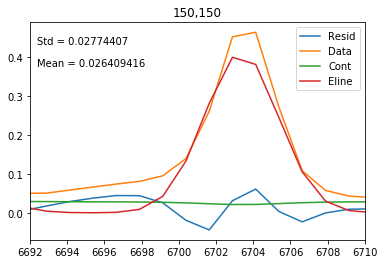

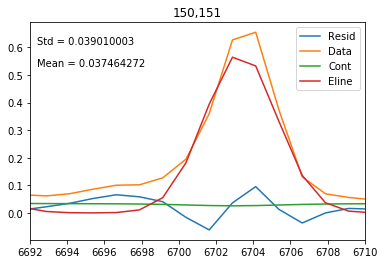

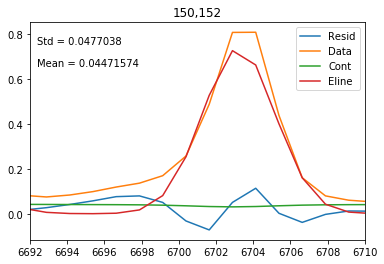

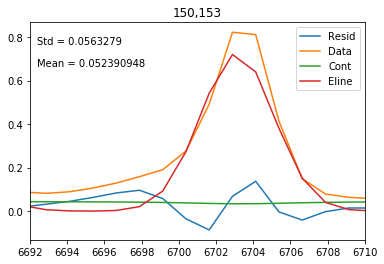

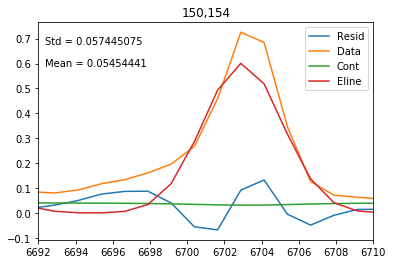

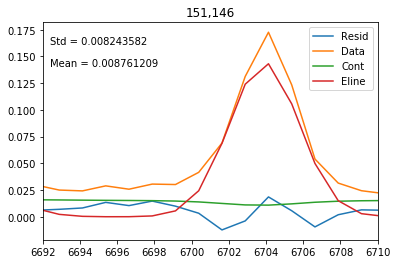

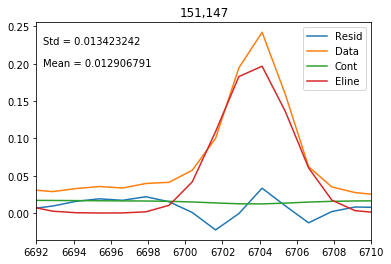

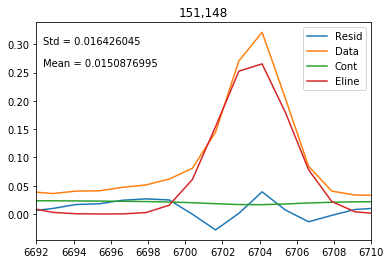

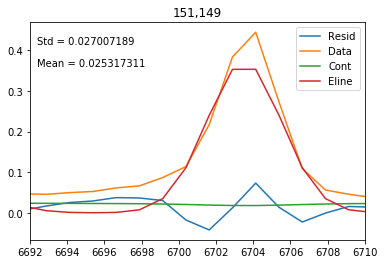

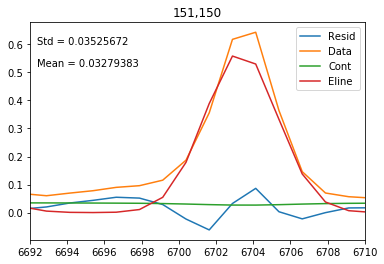

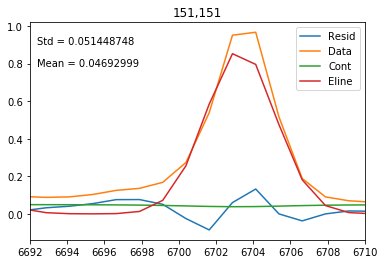

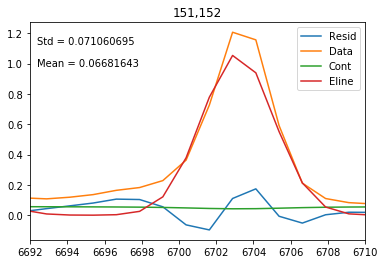

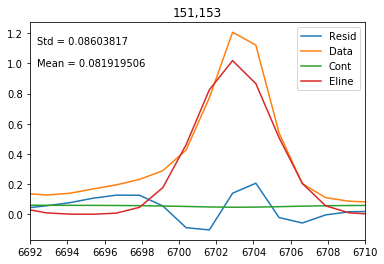

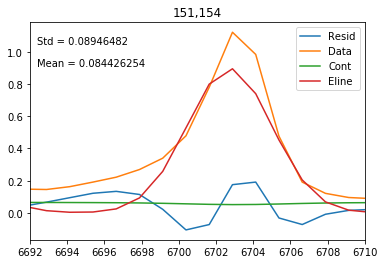

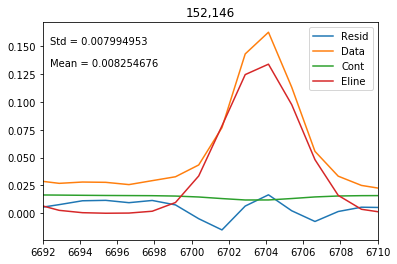

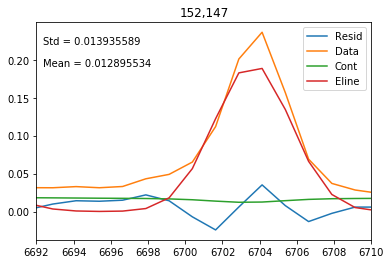

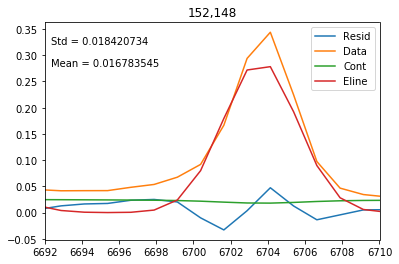

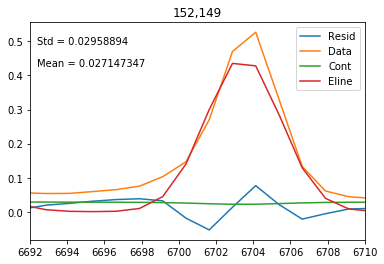

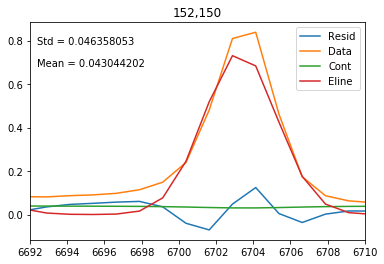

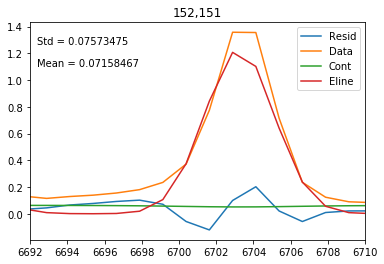

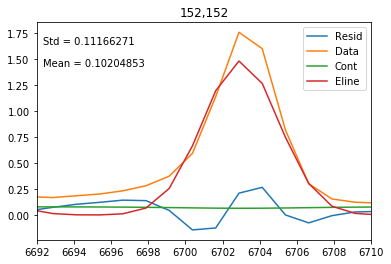

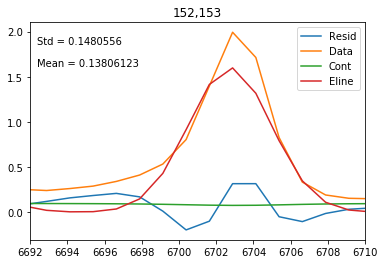

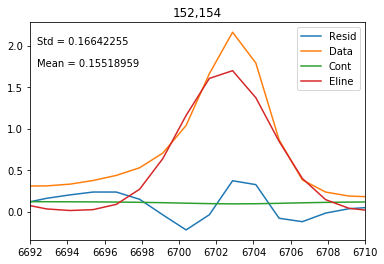

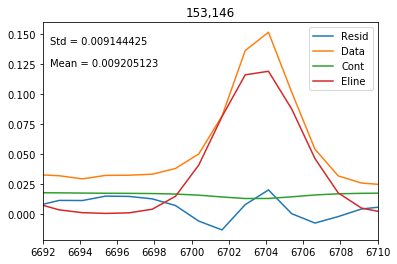

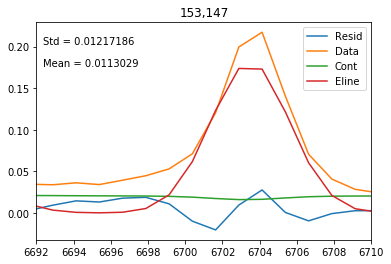

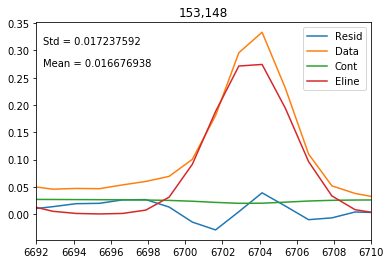

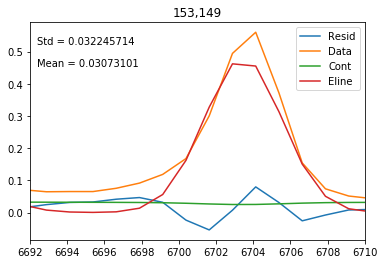

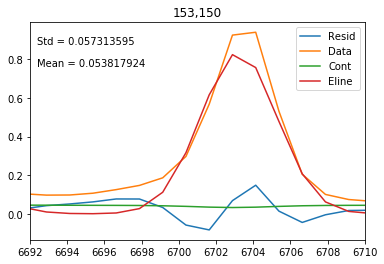

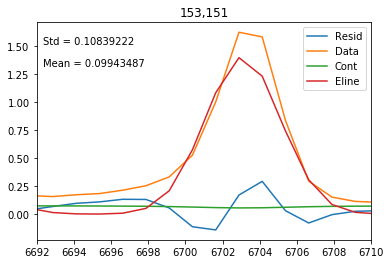

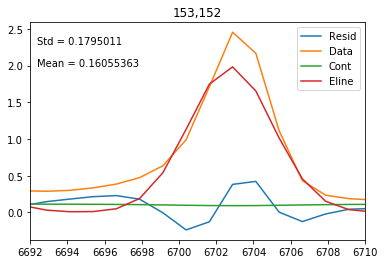

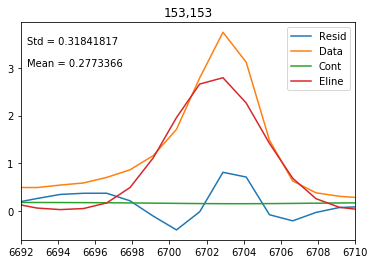

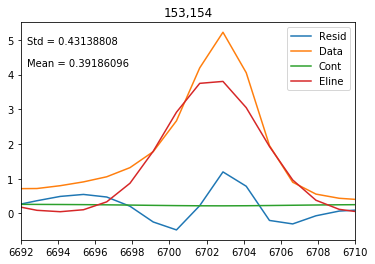

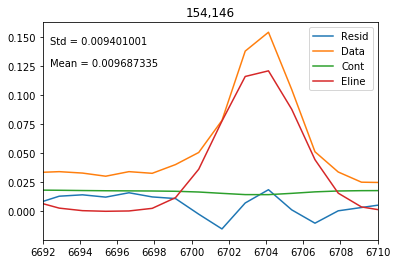

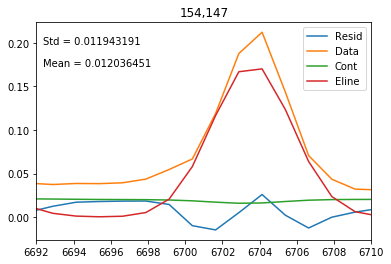

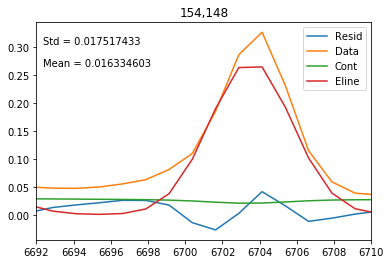

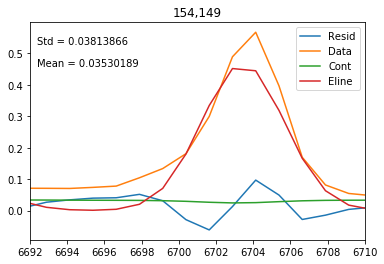

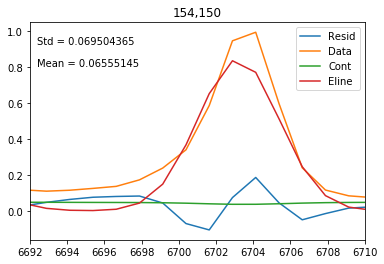

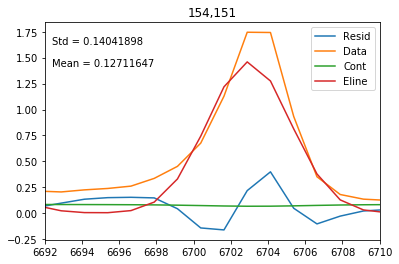

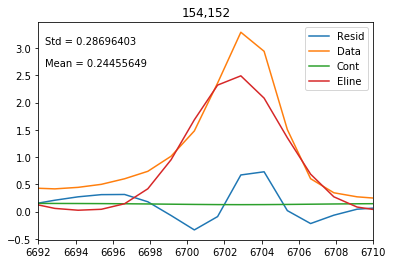

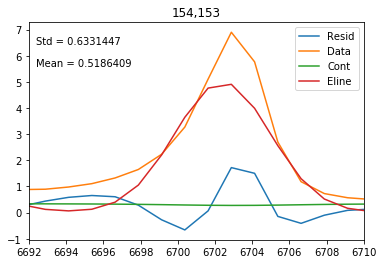

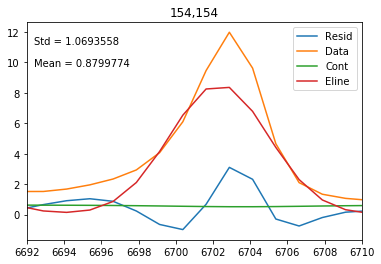

In [177]:
resid_std = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
resid_mean = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
resid_gaussian = np.zeros((np.shape(hdulist[0].data)[1], np.shape(hdulist[0].data)[2]))
wave_range = [6692, 6710]#[4950,4975]
index_1 = find_nearest(wav,wave_range[0])[0]
index_2 = find_nearest(wav,wave_range[1])[0]
#return idx, array[idx]

gas_select = (Ha_flux / Ha_flux_err > 10)
Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_flux_map[eline_y_cor[gas_select],eline_x_cor[gas_select]] = Ha_flux[gas_select]

plt.clf()
plt.imshow(Ha_flux_map, norm = matplotlib.colors.LogNorm())

plt.colorbar()
plt.show()




for i in range(np.shape(hdulist[0].data)[1]):
    for j in range(np.shape(hdulist[0].data)[2]):
        if np.isnan(Ha_flux_map[i,j]):# or abs(150 - i) > 2 or abs(150 - j) > 2:
            continue
        residual = hdulist[0].data[:,i,j] -cont_model[0].data[:,i,j] -eline_model[0].data[:,i,j]
        OG = hdulist[0].data[:,i,j]
        
        cont = cont_model[0].data[:,i,j]
        eline = eline_model[0].data[:,i,j]
        
        if abs(150 - i) < 5 and abs(150 - j) < 5:
        #Ha_flux_map[i,j] > 10**2:
            min_here = min(OG[index_1:index_2])
            max_here = max(OG[index_1:index_2])
            plt.clf()
            plt.plot(wav, residual, label='Resid')
            plt.plot(wav, OG, label='Data')
            plt.plot(wav, cont, label='Cont')
            plt.plot(wav, eline, label='Eline')

            plt.legend()
            plt.annotate('Std = '+str(np.std(residual[index_1:index_2])), 
                         xy=(0.02,0.9), xycoords='axes fraction')

            plt.annotate('Mean = '+str(np.mean(abs(residual[index_1:index_2]))), 
                         xy=(0.02,0.8), xycoords='axes fraction')
            plt.title(str(i)+','+str(j))
            plt.xlim(wave_range)
            #plt.ylim([min_here, max_here])
            plt.show()

        '''plt.clf()
        plt.plot(wav[wave_range[0]:wave_range[1]], residual[wave_range[0]:wave_range[1]])
        plt.show()'''
        resid_std[i,j] = np.std(residual[index_1:index_2])
        resid_mean[i,j] = np.mean(abs(residual[index_1:index_2]))
        
        
        # Maybe also fit a Gaussian tot he residuals?
        # Naw it looks too difficult :()
        
        
        

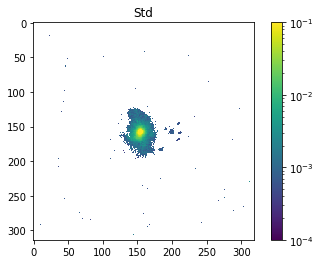

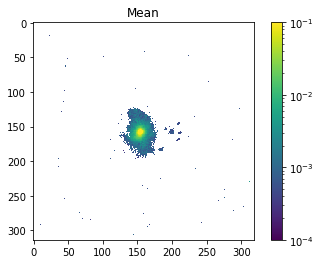

In [204]:
# This is for Hbeta

plt.clf()
plt.imshow(np.flipud(resid_std),  norm = matplotlib.colors.LogNorm(), vmin = 10**-4, vmax=10**(-1))
plt.colorbar()
plt.title('Std')
plt.show()

plt.clf()
plt.imshow(np.flipud(resid_mean), norm = matplotlib.colors.LogNorm(), vmin = 10**-4, vmax=10**(-1))
plt.colorbar()
plt.title('Mean')
plt.show()